In [1]:
import numpy as np
import pandas as pd

In [2]:
with open('countries-gen_1.xml') as file1:
    xml1 = file1.read()
with open('countries-gen_2.xml') as file2:
    xml2 = file2.read()

In [3]:
from schemamatching import *

In [4]:
outputs = compare_xmls(xml1, xml2)

In [5]:
def compare_xmls(xml1, xml2):
    xml1_data = collect_instance_data(xml1)
    xml1_features = get_features(xml1)
    xml2_data = collect_instance_data(xml2)
    pipeline = create_pipeline()
    pipeline.fit(xml1_features['item'], xml1_features['tag'])

    output_shape =len(xml2_data.keys()), len(xml1_data.keys())
    outputs = pd.DataFrame(np.zeros(output_shape),
        index=xml2_data.keys(), columns=xml1_data.keys())
    
    for tag in xml2_data:
        predictions = pipeline.predict(xml2_data[tag])
        total = len(predictions)
        for p in predictions:
            outputs.loc[tag, p] += 1.0 / total
    return outputs

outputs = compare_xmls(xml1, xml2)

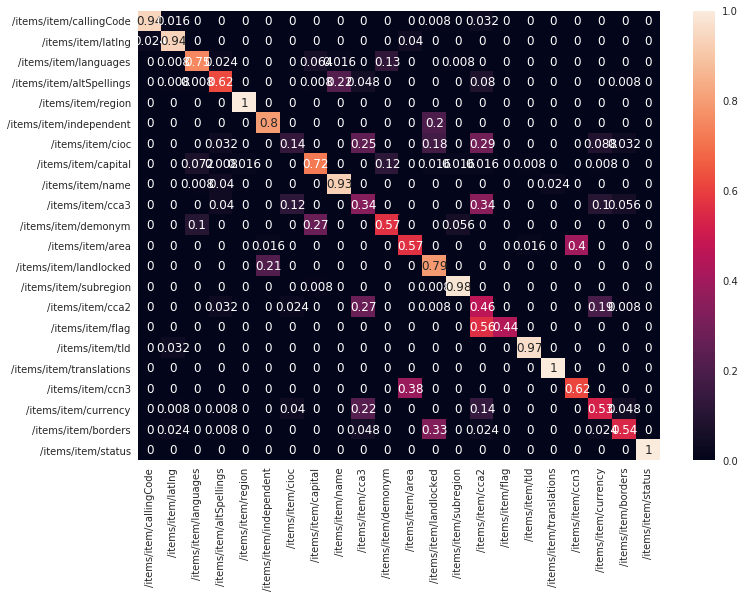

In [6]:
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(outputs, annot=True)